In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
    content_market.add_consumer(consumer)

In [6]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Iteration 1 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.10132664919844062
Producer topic change: 0.8589118867328092
Producer utility change: 0.3891331999819534
Iteration 2 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.5324440892984482
Producer topic change: 1.340695868331056
Producer utility change: 0.10435890183155117
Iteration 3 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.7221726747839904
Producer topic change: 1.1979041077323092
Producer utility change: 0.043316075695855494
Iteration 4 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.02618202053643939
Producer topic change: 0.8810840375786071
Producer utility change: 0.018929897323451073
Iteration 5 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.522946037626158
Producer topic change: 0.24406671989545553
Producer utility change: 0.008827884828882082
Iteration 6 / 100 done.
Consumer rate change: 0.0
Consumer utility c

In [7]:
import matplotlib.pyplot as plt

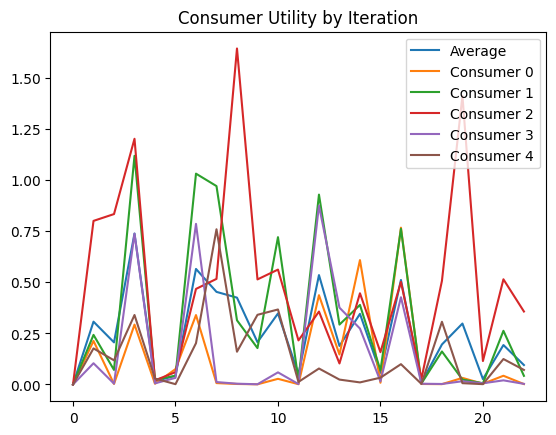

In [17]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index))
plt.legend()
plt.show()

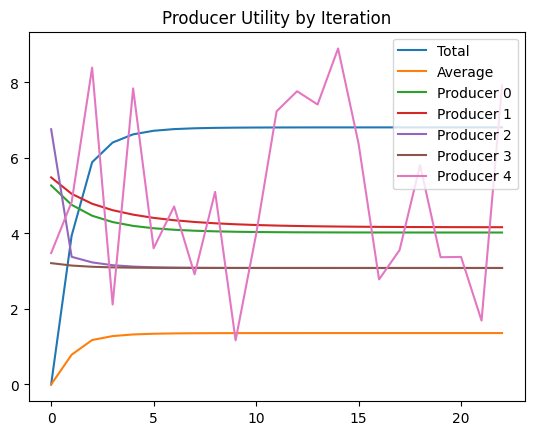

In [15]:
plt.figure()
plt.title("Producer Utility by Iteration")
plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index))
plt.legend()
plt.show()

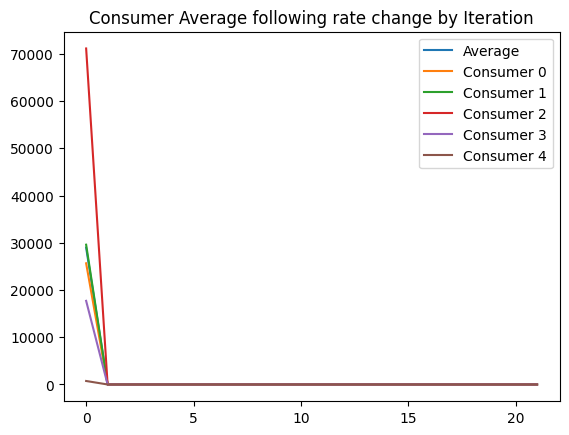

In [10]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index))
plt.legend()
plt.show()

In [11]:
consumer_stats

{0: {'following_rates': [array([0.82580752, 0.01430084, 0.03371487, 0.00932547, 0.0505426 ,
          0.        ]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, -4682.60968329,
          -4682.56318763, -4682.61900876]),
   array([23413.97895686, -4682.60470792, -4682.58529389, 

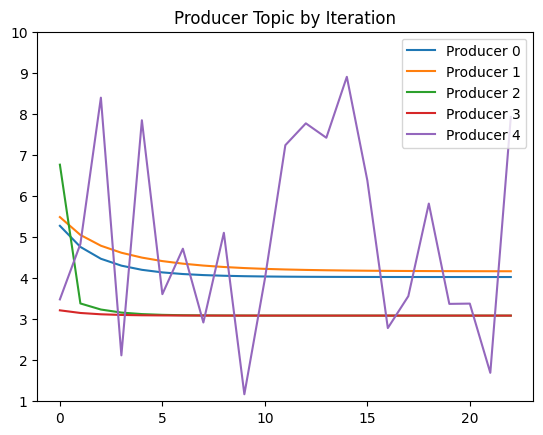

In [12]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index))
plt.legend()
plt.ylim(topics[0][0], topics[0][1])
plt.show()

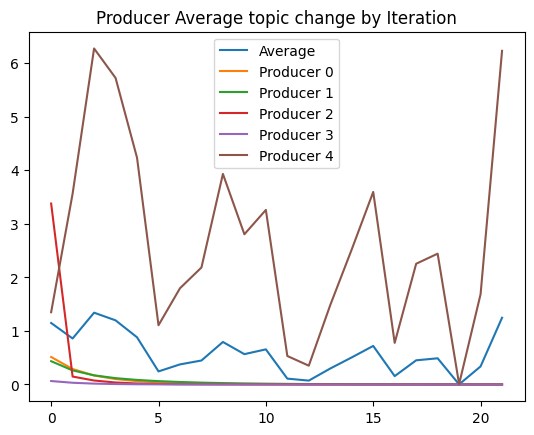

In [13]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index))
plt.legend()
#plt.ylim(topics[0][0], topics[0][1])
plt.show()